# Assignment 3

In [1]:
#imports
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.preprocessing import StandardScaler

# choose data
#path = 'data_200.csv'
#path = 'data_500.csv'
path = 'data_all.csv'

## 1: scatter plot

      residue name  position chain         phi         psi
0              LYS        10     A -149.312855  142.657714
1              PRO        11     A  -44.283210  136.002076
2              LYS        12     A -119.972621 -168.705263
3              LEU        13     A -135.317212  137.143523
4              LEU        14     A -104.851467   95.928520
...            ...       ...   ...         ...         ...
29364          GLY       374     B -147.749557  155.223562
29365          GLN       375     B -117.428541  133.019506
29366          ILE       376     B -113.586448  112.091970
29367          ASN       377     B -100.668779  -12.102821
29368          LYS       378     B -169.951240   94.233680

[29369 rows x 5 columns]


,phi,psi
0,-149.312855,142.657714
1,-44.283210,136.002076
2,-119.972621,-168.705263
3,-135.317212,137.143523
4,-104.851467,95.928520
...,...,...
29364,-147.749557,155.223562
29365,-117.428541,133.019506
29366,-113.586448,112.091970
29367,-100.668779,-12.102821


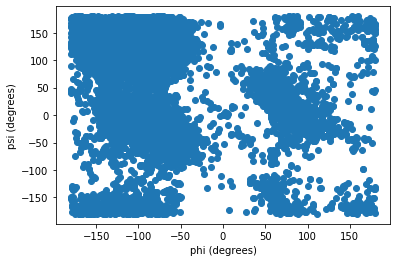

In [2]:
# read data
df = pd.read_csv(path)
# print data
print(df)
# scatter plot data
x = df['phi']
y= df['psi']
X = df[['phi','psi']]
plt.scatter(x, y)
# add labels
plt.xlabel('phi (degrees)')
plt.ylabel('psi (degrees)')
X

## 2: K means clustering

### 2.a: Try different k values

In [3]:
def drawClusters(k): # k = # clusters
    # create clusters
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    # draw data points
    plt.figure(figsize=(25,25))
    plt.scatter(x,y)
    # draw cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', s=10000)

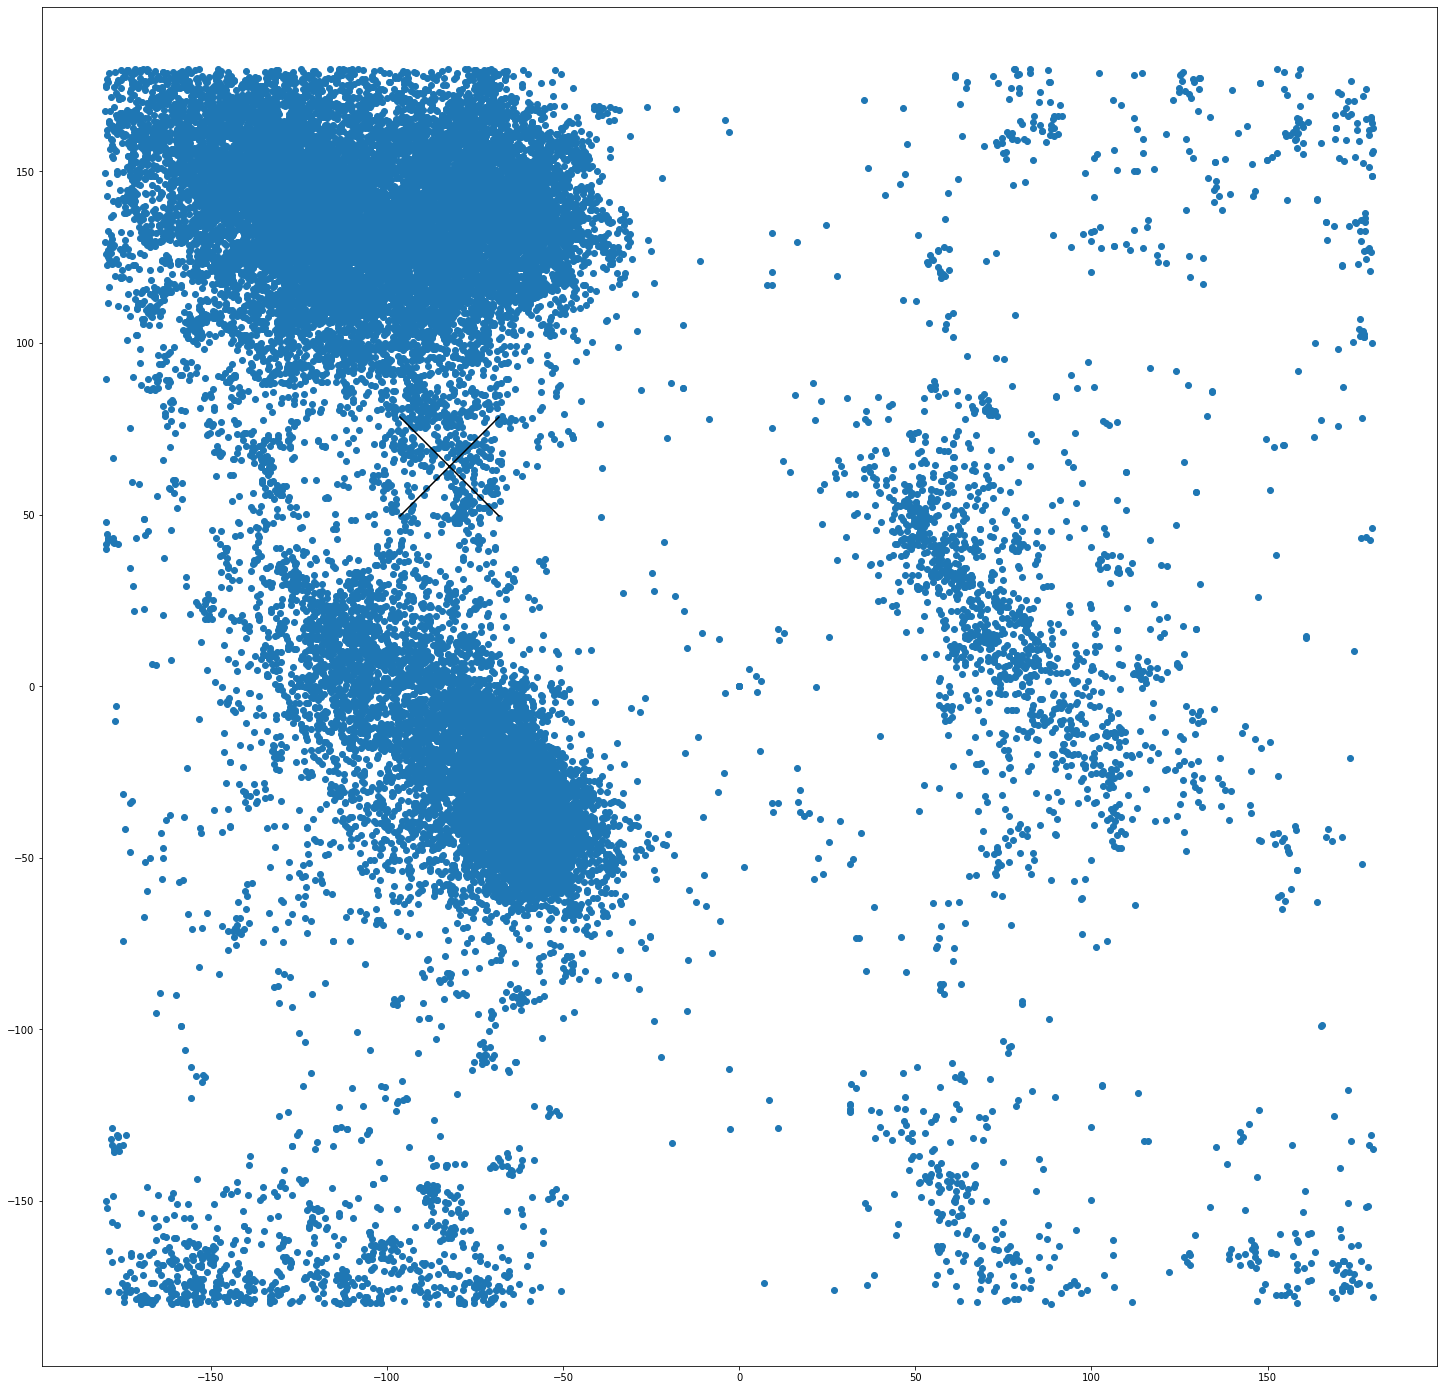

In [4]:
# k = 1
drawClusters(1)

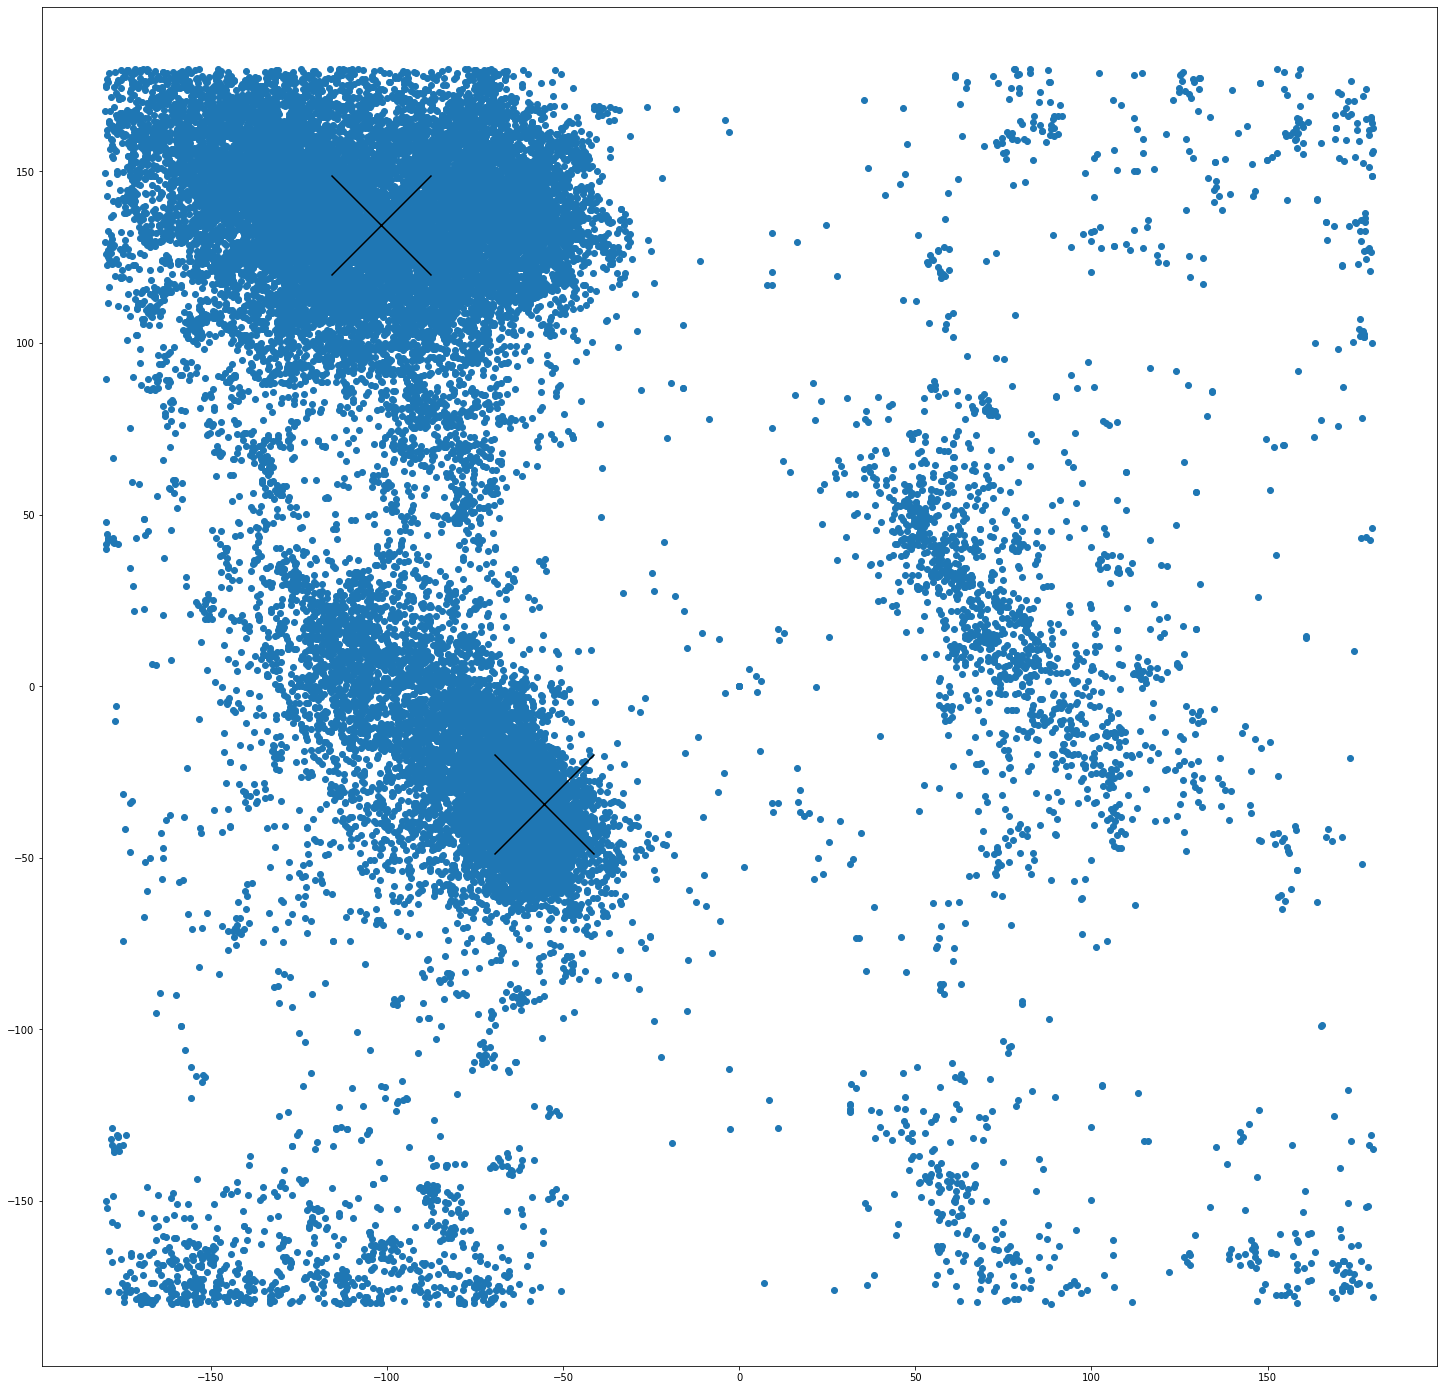

In [5]:
# k = 2
drawClusters(2)

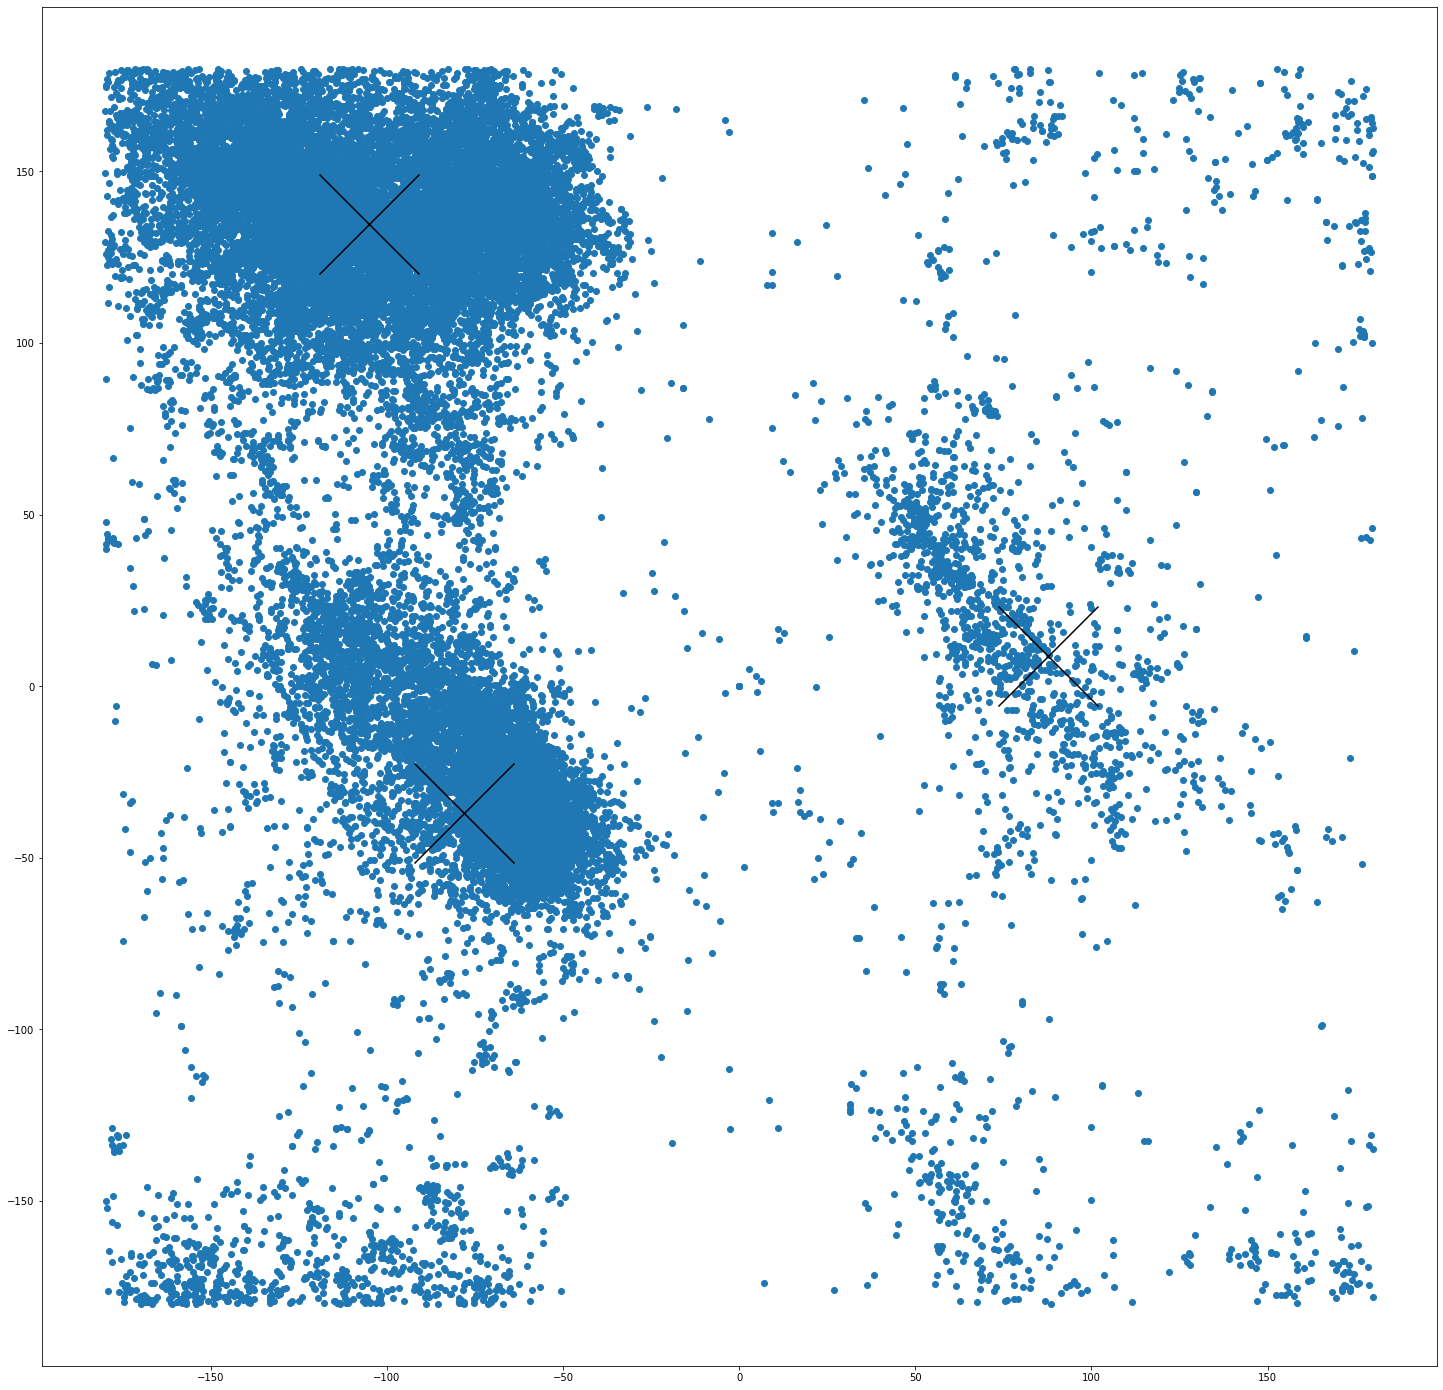

In [6]:
# k = 3
drawClusters(3)

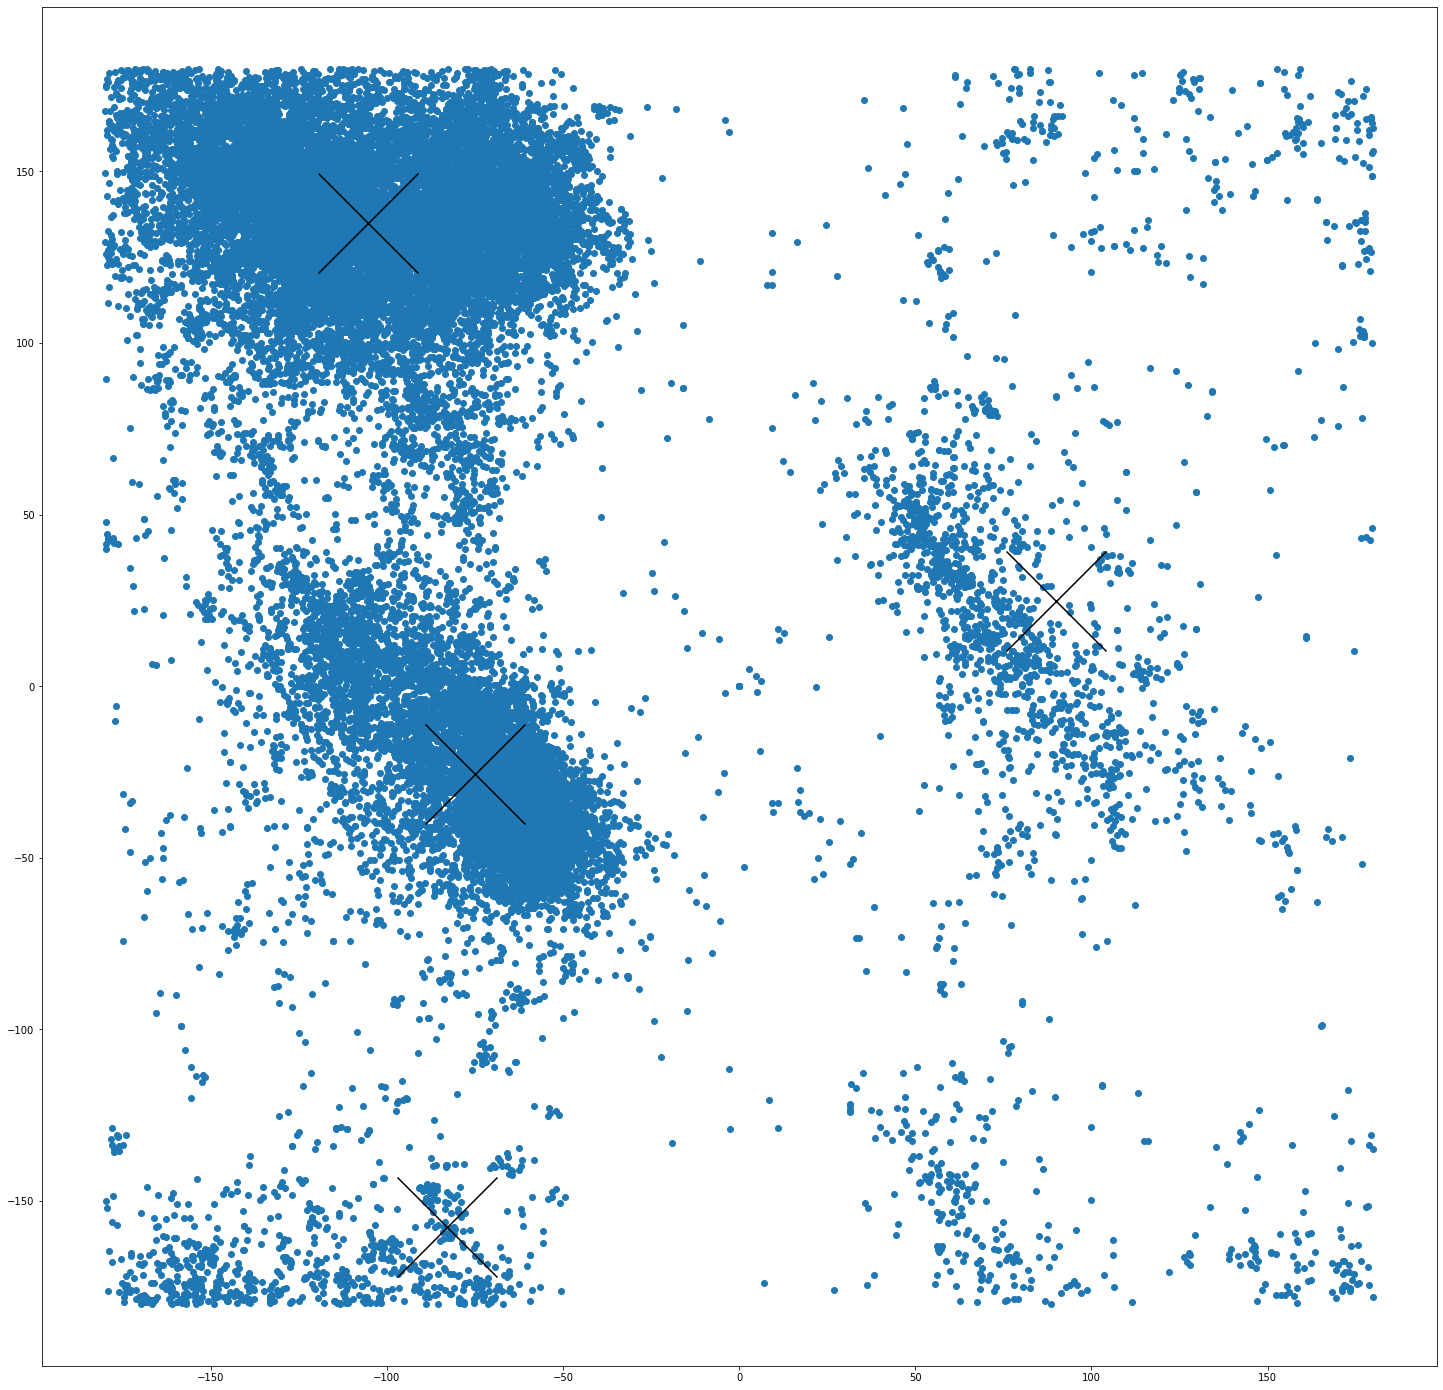

In [7]:
# k = 4
drawClusters(4)

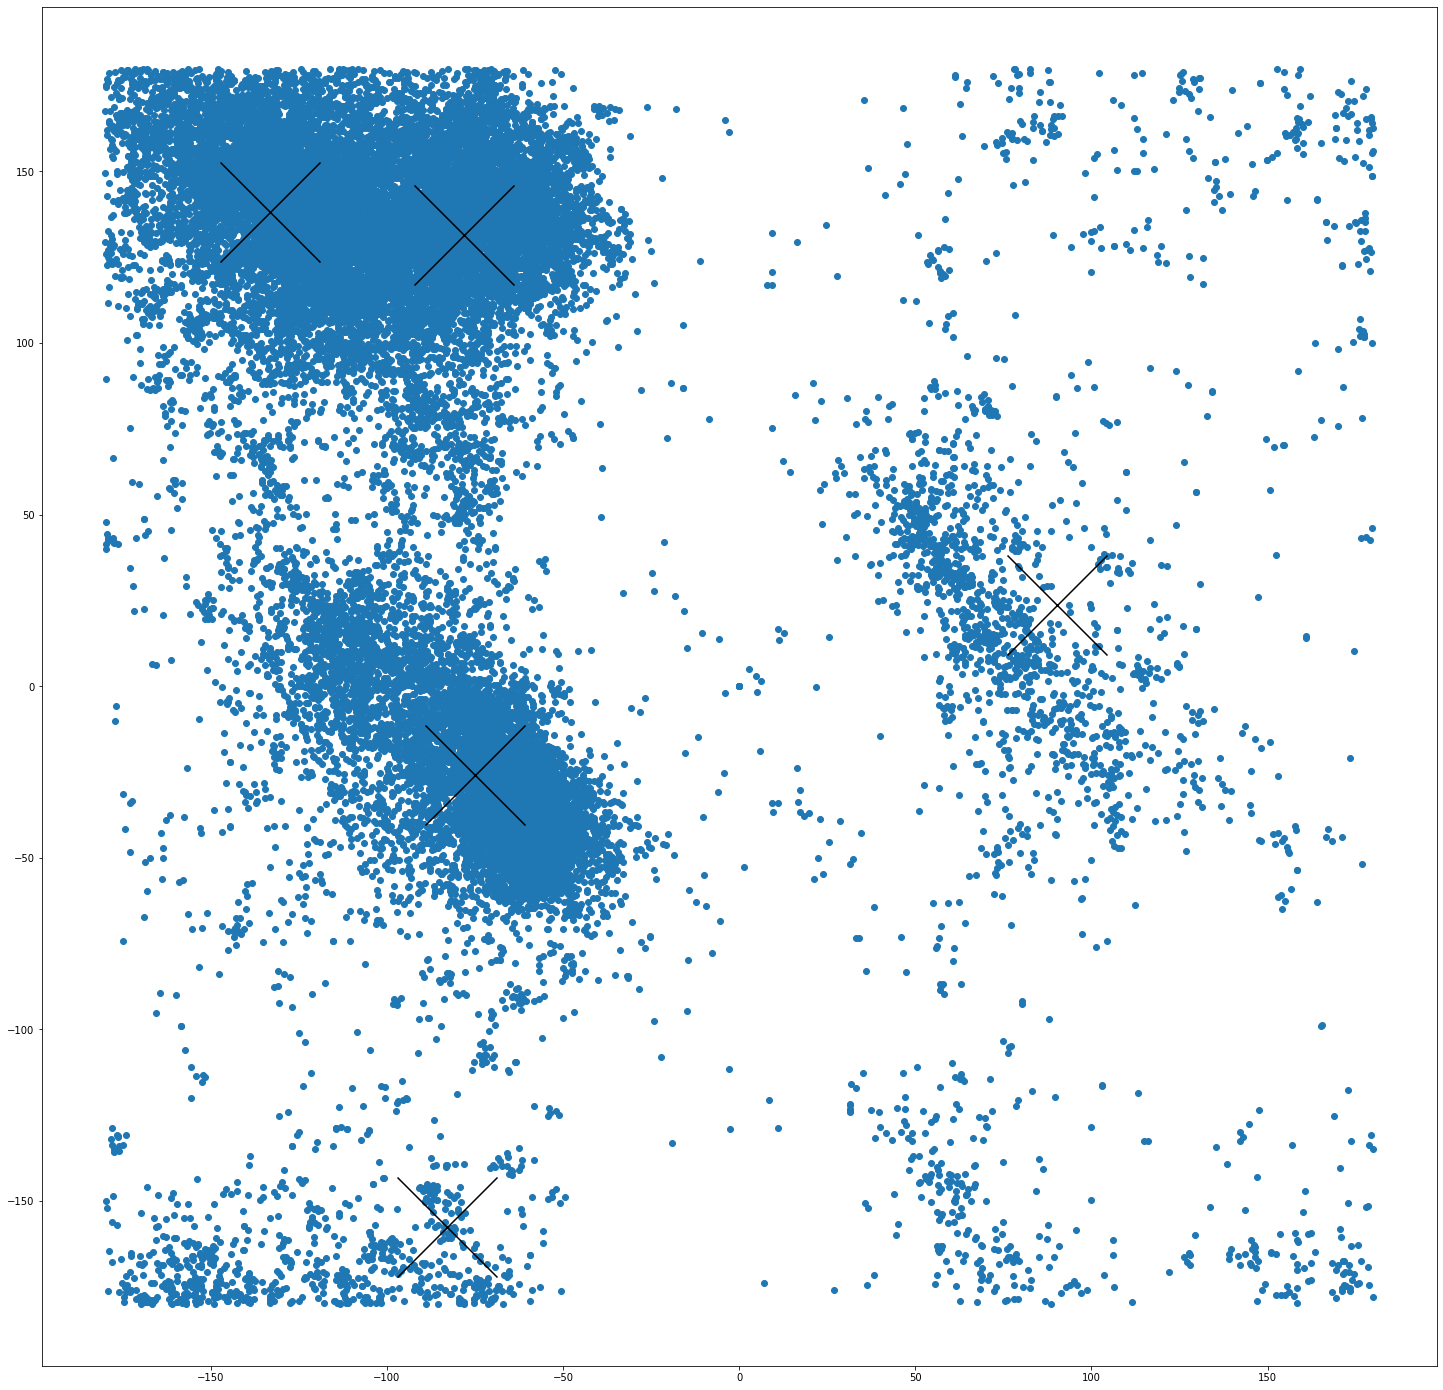

In [8]:
# k = 5
drawClusters(5)

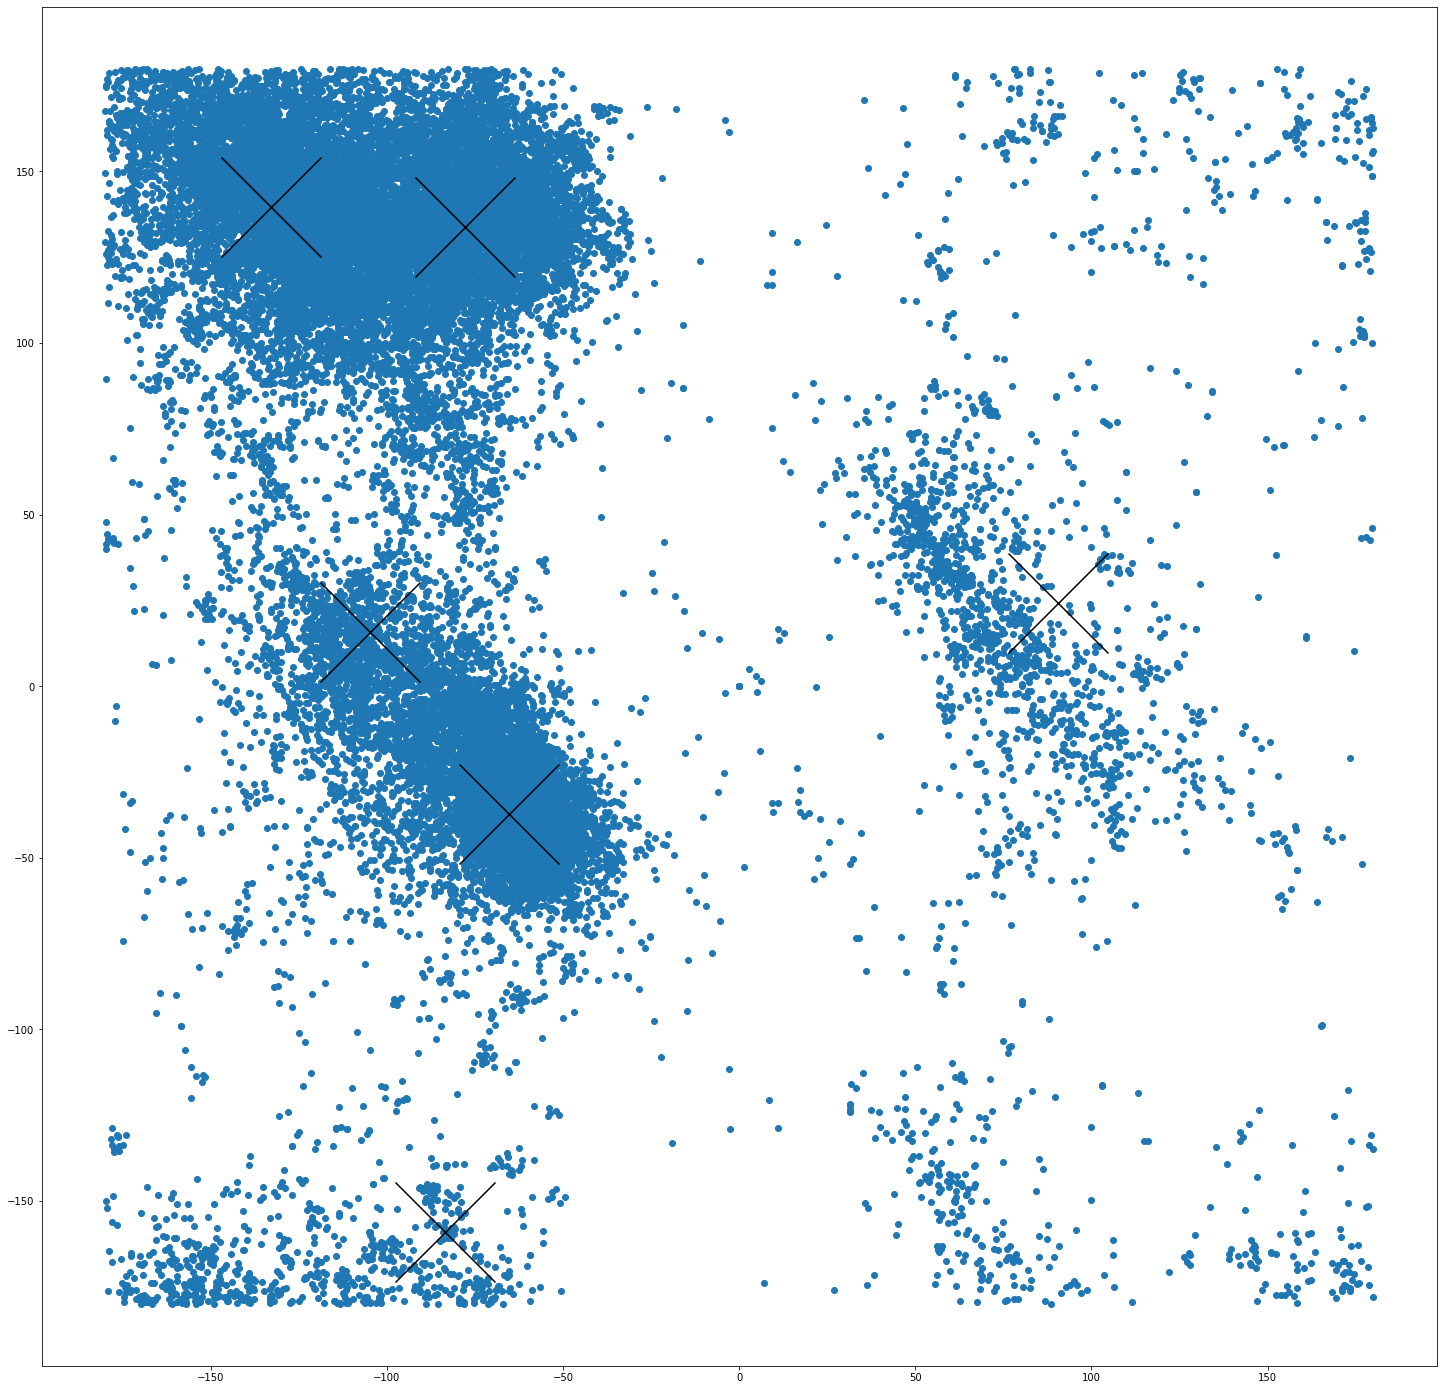

In [9]:
#k = 6
drawClusters(6)

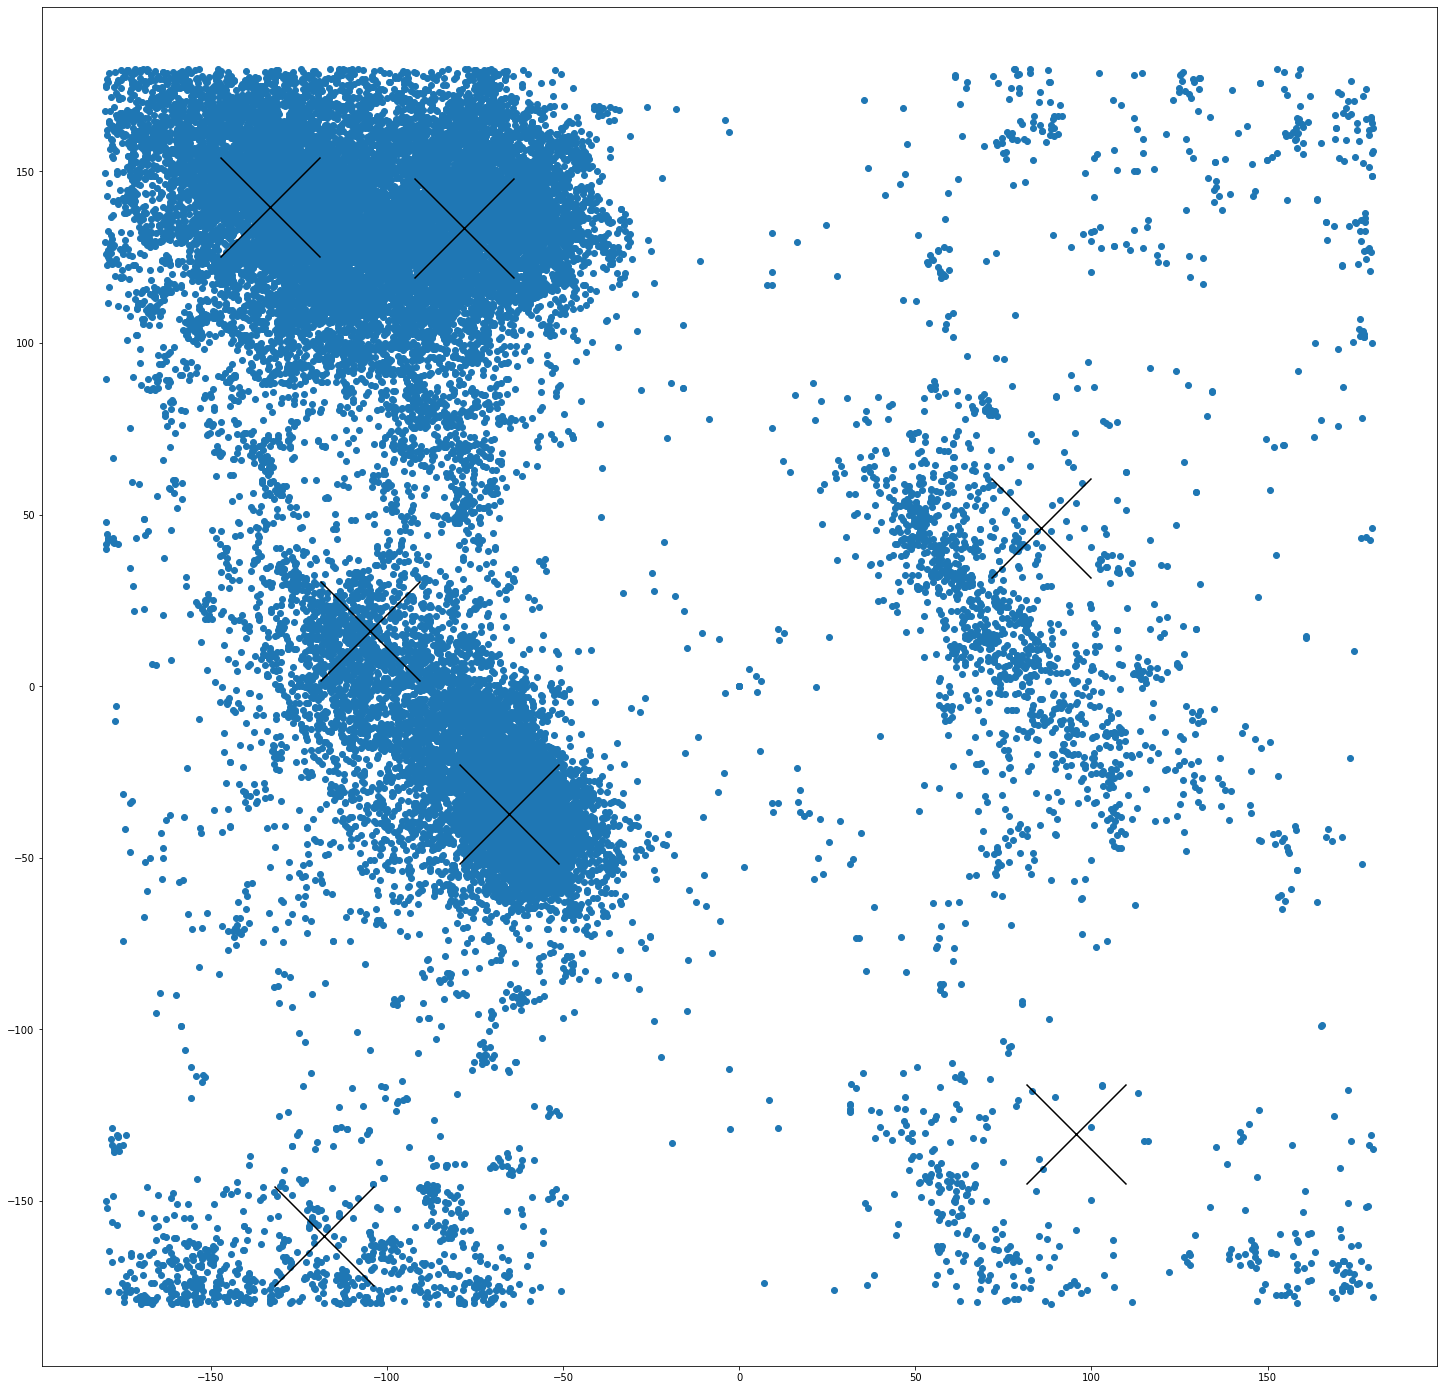

In [10]:
# k = 7
drawClusters(7)

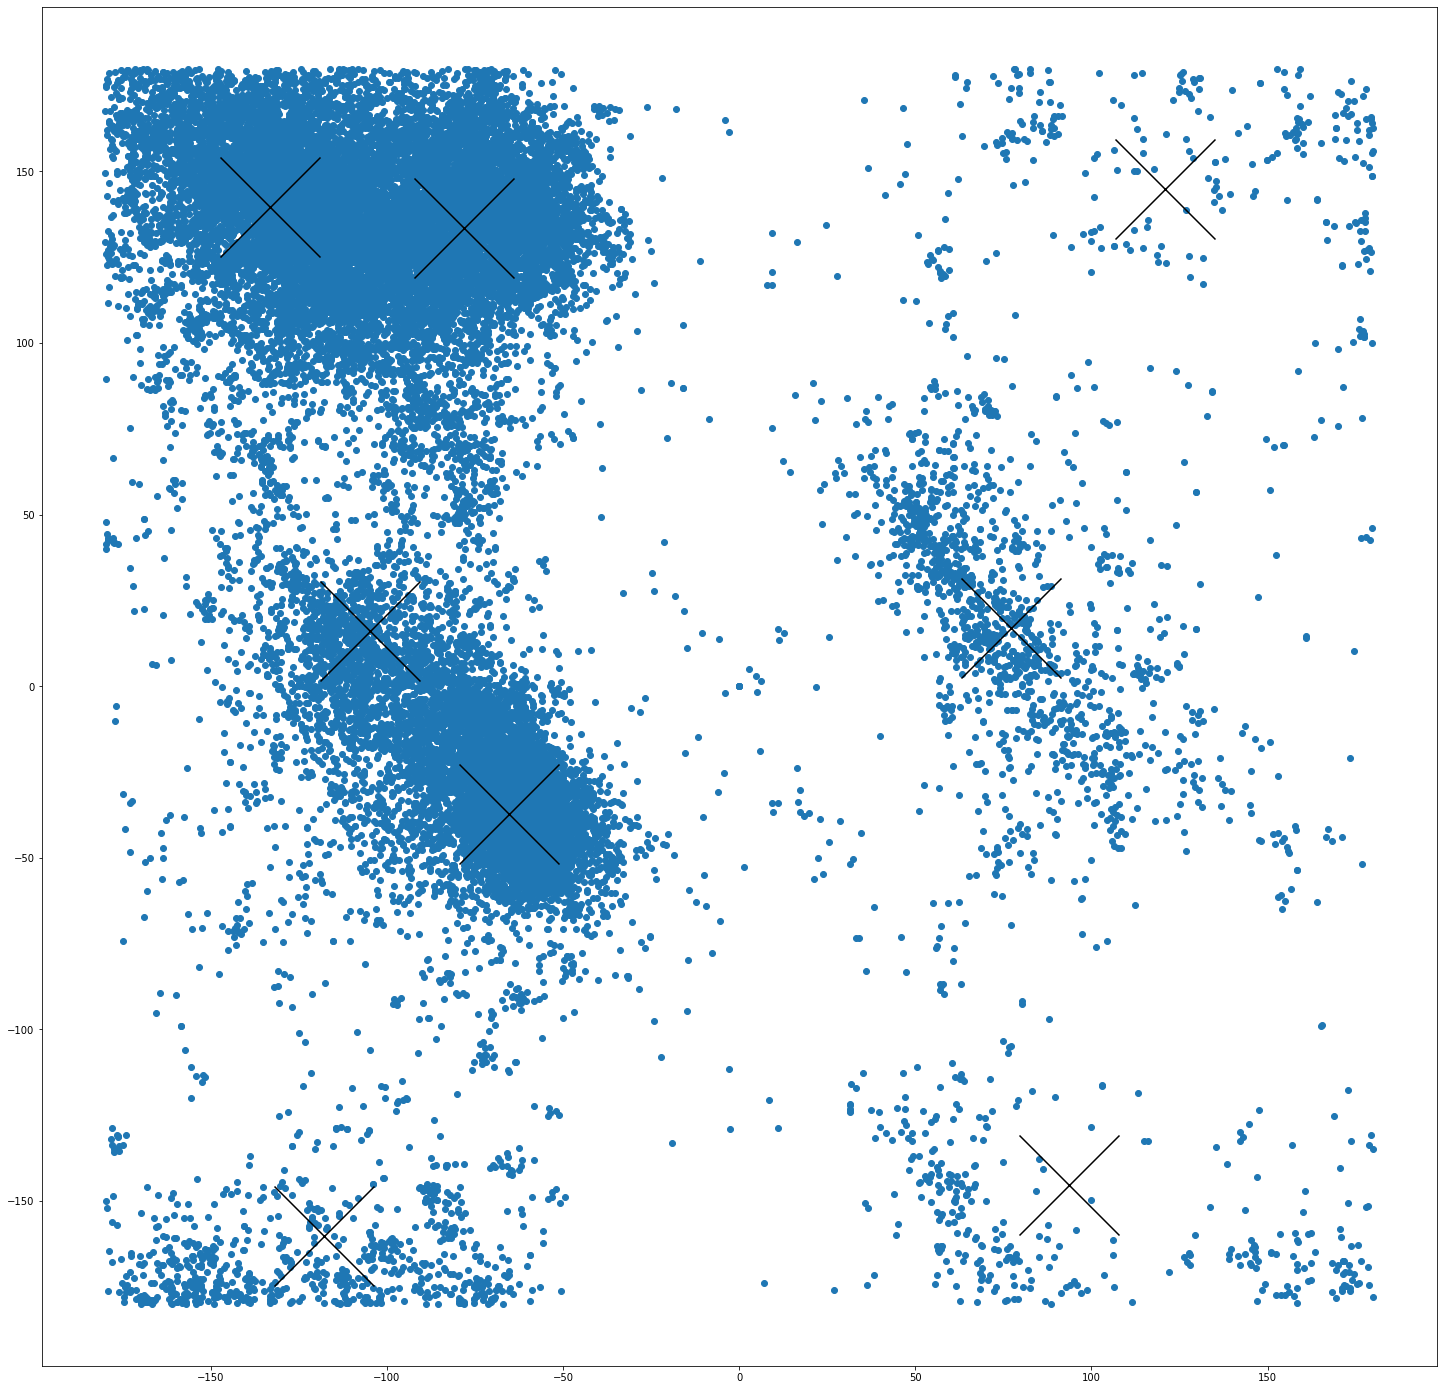

In [11]:
# k = 8 
drawClusters(8)

We can assume there are 4 underlying clusters by looking at the scatter plot of the data, meaning k=4 is suitable. The clusters appear to be spread about some center point somewhat uniformly, meaning k-means clustering would be suitable here. DBSCAN could probably also work since the clusters aren't very close to each other. No two different clusters are centered around the same point in any part (wither locally or overall) though, meaning DBSCAN is not needed to separate the clusters.

By looking at the scatter plot we can assume there might be 4 to 5 underlying clusters, which becomes more apparent by shifting the data as shown in 2.d. There are 4 very distinguished clusters but one could also choose to see the bigger chunk between the two biggest clusters on the right as it's own cluster.

However if we solely look at the data in its direct form there seems to be 7 to 8 clusters. We get more clusters since two clusters are cut off at the top, wrapping around

In any case, this essentially means we get more clusters from the k-means clustering than what there are in practice. This is not a huge problem though since it is more important to divide clusters that belong to different underlying clusters than what it is to group all parts of each underlying clustes to the same cluster. This is because even if an underlying cluster gets divided up into 2 or more differe    nt cluster using k-means, we can still say that all those clusters should be categorized under the same category (the same underlying cluster).

### 2.b: Validate clusters
We use the elbow method to verify the clusters. The elbow method entails making a graph for k-means clusterings for different k values. The x axis has the k value and the y axis has the maximum distance betweem two points within the clusters. To find the best candidate according to this method, one should pick the k value corresponding to the point where the graph's slope changes the most. This is because this point generally corresponds to where increasing the k value will only mean dividing up already coherent clusters further, rather than dividing up clusters that actually consist of multiple clusters. The quick change of  

Text(0.5, 1.0, 'Elbow curve')

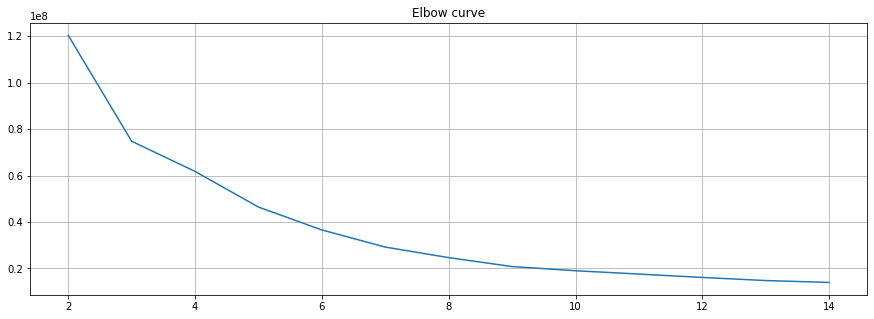

In [12]:
# X = # <your_data>
distorsions = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), distorsions)
plt.grid(True)
plt.title('Elbow curve')

### 2.c: Reason about clusters in 2.a
To expand on the the reasoning in 2.a, the centers for the cluster found using k-means with k=4 do all seem to be in the center for each cluster.

### 2.d: Shifting data for better results


## 3: DBSCAN clustering

In [13]:
# start point for centers
centers = [[1, 1], [-1, -1], [1, -1]]

X = StandardScaler().fit_transform(X)


In [14]:
# help function for drawing dbscans for given max distance and min sample
def drawDBSCAN(max_distance, min_samples):
    # Compute DBSCAN
    db = DBSCAN(max_distance, min_samples).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # Plot result
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.figure(figsize=(25,25))
    plt.show()

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)

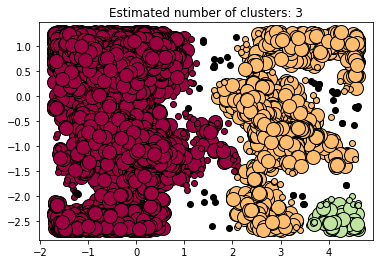

<Figure size 1800x1800 with 0 Axes>

Estimated number of clusters: 3
Estimated number of noise points: 46


In [15]:
drawDBSCAN(0.3,15)

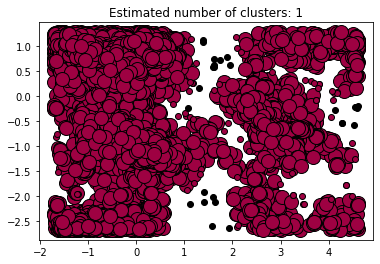

<Figure size 1800x1800 with 0 Axes>

Estimated number of clusters: 1
Estimated number of noise points: 26


In [16]:
drawDBSCAN(0.3,10)

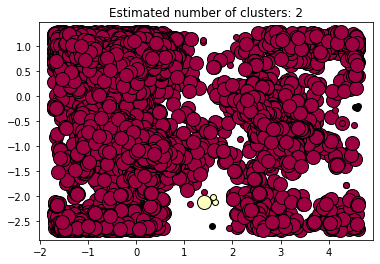

<Figure size 1800x1800 with 0 Axes>

Estimated number of clusters: 2
Estimated number of noise points: 5


In [17]:
drawDBSCAN(0.3,5)

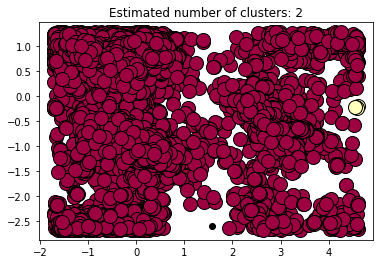

<Figure size 1800x1800 with 0 Axes>

Estimated number of clusters: 2
Estimated number of noise points: 1


In [18]:
drawDBSCAN(0.3,2)

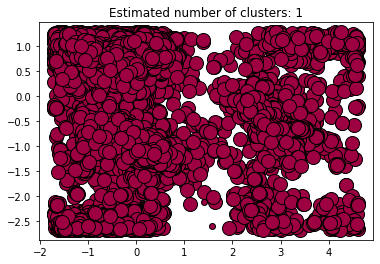

<Figure size 1800x1800 with 0 Axes>

Estimated number of clusters: 1
Estimated number of noise points: 0


In [19]:
drawDBSCAN(0.6,15)

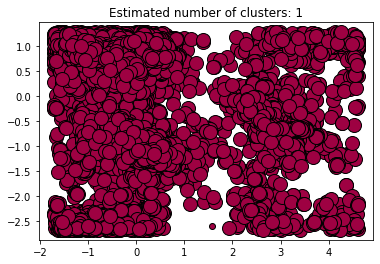

<Figure size 1800x1800 with 0 Axes>

Estimated number of clusters: 1
Estimated number of noise points: 0


In [20]:
drawDBSCAN(0.6,10)

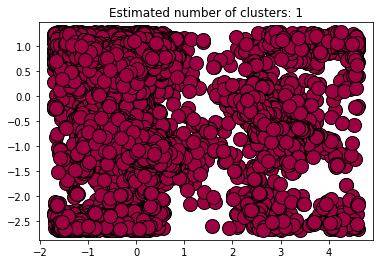

<Figure size 1800x1800 with 0 Axes>

Estimated number of clusters: 1
Estimated number of noise points: 0


In [21]:
drawDBSCAN(0.6,5)

In [ ]:
drawDBSCAN(0.6,2)

In [ ]:
drawDBSCAN(0.9,15)

In [ ]:
drawDBSCAN(0.9,10)

In [ ]:
drawDBSCAN(0.9,5)

In [ ]:
drawDBSCAN(0.9,2)

### 3.a: Motivate min samples & max distance

### 3.b: Visualization and outliers

### 3.c: Compare DBSCAN and k means clusters
A strength of DBSCAN is that it can omitt points that are too close to 2 different clusters, meaning it's too hard to tell which cluster they should belong to. This can make the clusters have higher accuracy but it can also be a downside if you absolutely need all points to be classified, even at the cost of some inaccuracy.

### 3.d: Robustness of DBSCAN

## 4: Comparison of clusters